## zigzag
就是把zym的代码更改一下
改成我自己用的东西

## 我自己的理解
这里主要是对于zigzag里面用到的这个矩阵，其实他们构造矩阵的时候的特点是所有的信息包含在每一个编码的变量里面。        
应该有很多可以修改这个。？？？这个主要存在的问题是要不就全回复出来，要不就一定全都回复不出来。？？？？      
？？？问题来了如何产生任意多不重复的码流呢？？？？？        
为什么说只要G的行列式值不为0就一定可以会付出所有的信息。只要行列式不为0，说明通过移位生成仅仅包含        
### 信息构造
每个编码信息的结构是，\[encoding_data_matrix,encoding_matrix\],
最小颗粒是1BYTE             
encoding_data_matrix 的大小是，原始数据长度+$2^m$偏移数据长度         
enconding_matrix是有原始数据k+冗余数据r决定的。         
$k+r<=2^m$

### 有限域的运算函数
$gf=GF(2^w)$
包含 加减乘除指数


使用Galois_field 步骤

初始化阶数 order=GF_set(3)


#### 对应编码解码库文件
fec_code.py

In [2]:
import numpy as np

from  Galois_field_v2 import  *
from  fec import *
from Erasure_Channel import *

In [2]:
#########参数设置和初始化
gf_w=8##伽罗华域2**gf_w
k=2#分组中原始数据包数量
length=100#数据长度
r=100#冗余数据包数量
loss_rate=0.8###丢包率
gf=GF(gf_w)##初始化伽罗华域
file_name="log_decode"
zigzag_corsi=ZIGZAG_Corsi(k,length,r,gf)###初始化   
zigzag_corsi.set_ec_loss_rate(loss_rate)
###########生成编码矩阵
#zigzag_corsi.generate_encoding_matrix()
##############产生初始随机数据，
zigzag_corsi.random_generate_original_data()
zigzag_corsi.set_fd(file_name)
##################把encoding_matrix转换成shiftmatrix
#zigzag_corsi.generate_shiftmatrix()
#zigzag_corsi.random_generate_original_data()
#print(zigzag_corsi.shift_matrix)
#print(aa.original_data_matrix)
##########产生编码数据。

success=0
with open(file_name,"w") as fd:
    for times in range(10000):
        
        zigzag_corsi.generate_encoding_matrix()
        zigzag_corsi.encoding()
        #print(aa.encoding_data_matrix)


        decodeable=zigzag_corsi.deliver_all_message_on_ec()
        if not decodeable:
            continue
        r=zigzag_corsi.decoding_vv1(fd)
        #print(r)
        success+=r
print(success)   

thsi is gf <Galois_field_v2.GF object at 0x7fdc376a97f0>
2003


In [14]:
############我简单产生一个k=2 r=100的使用2**8的有限域的使用
gf_w=8##伽罗华域2**gf_w
k=3#分组中原始数据包数量
length=100#数据长度
r=250#冗余数据包数量
loss_rate=0.8###丢包率
gf=GF(gf_w)##初始化伽罗华域
file_name="log_decode"
zigzag_corsi=ZIGZAG_Corsi(k,length,r,gf)###初始化
zigzag_corsi.generate_encoding_matrix()
zigzag_corsi.generate_shiftmatrix()


thsi is gf <Galois_field_v2.GF object at 0x7fa1b1aa2d60>


In [46]:
def cell_random(w,seed):
    ll=set()
    start=seed
    new=""
    while 1:
        for i in range(w):
            #print(len(start),(i-1)%w)
            a=(1 if start[(i-1)%w]=="1" else 0)
            b=(1 if start[(i)]=="1" else 0)
            c=(1 if start[(i+1)%w]=="1" else 0)
            if i!=7:
                d=a^c
                new+=(str(d))
            else:
                d=a^b^c
                new+=(str(d))
        
        #print(new)
                

        if new in ll:
            return ll
        else:
            ll.add(new)
            start=new
            new=""
            
    return ll
aa=cell_random(37,"0"*37)   



In [47]:
len(aa)

1

In [8]:
import numpy as np
a=np.matrix([[0,4,2],[4,0,1],[0,1,3]])
np.linalg.det(a)

-40.0

In [5]:
success

0

### 解码步骤v1###
##思路是如果我看待每一个编码信息位的信息，是度。如果这一位有很多不知道原始信息的矩阵混叠，度>1,如果度==1，说明这一位包含仅仅一##个未知信息，则一定可以解出来。如果度==0，说明他包含的信息已经全部解出来了。 
##step1 对于每一个encoding_data_matrix，收到的构造度矩阵
##step2 开始扫描，如果度为1，就开始解码。然后对于所有包含这个的元素，encoding_data_matrix 的元素，剔除这个元素。并且对应的度减1，然后再扫描
##set3 再次扫描，直到无法更新。或者全部解码。

In [4]:
###解码步骤v2###
##思路是如果我找到每一个信息第一个比特那么我就可以还原出这个矩阵


(5, 18)


In [2]:
    def generate_receive_degree_matrix(self, ):
        ##构建degree matrix和接受矩阵一样大
        ##degree=1 直接可以还原，degree=2.. 不能直接还原，并且 degree=0没意义跳过
        ## 我需要知道原始数据包的长度，个数。用于提取位置信息。
        ##step1 找到receive_encoding_matrix
        ###再去构造
        self.receive_encoding_matrix=self.receive_data_matrix[:,-self.original_data_number:]
        print(self.receive_encoding_matrix.shape)
        self.receive_degree_matrix=np.array([[set()*self.original_data_length] for i in range(self.receive_encoding_matrix.shape[0])])
        #######################################
        for receive_message in range(self.receive_data_matrix.shape[0]):
            for original_message in range(self.original_data_number):
                pos_start=self.receive_encoding_matrix[receive_message][original_message]
                for pos in range(pos_start,:pos_start+self.original_data_length):

                    self.receive_degree_matrix[receive_message][pos].add(original_message)

    





In [5]:
a={1,5,3}
a.remove(2)


KeyError: 2

In [9]:
self.x_set=[1 2 0]
self.y_set=[7 5 4 6 3]
receive data number=3
receive_encoding_matrix=
[[4 1 0]
 [0 2 4]
 [0 3 1]]



SyntaxError: invalid syntax (<ipython-input-9-d54a46180474>, line 1)

## LT码


In [46]:
##度分布函数和理想度分布函数
import matplotlib.pyplot as plt
import math
class RIDL:
    '''
    理想度分布函数
    '''
    def __init__(self,k,c,delta,):
        '''
        @parameter k:the number of input symbol
        @parameter c:
        @parameter delta:1-delta success rate 
        '''
        self.k=k
        self.p_ideal=[1/k if (i==1) else 1/((i-1)*i) for i in range(1,k+1)]
        R=c*math.log(k/delta)*math.sqrt(k)
        degree_max = round(k / R)
        P=[0 for i in range(k)]
        for i in range(k):
            now=i+1
            if now<=degree_max:
                P[i]=R/(now*k)
            elif now==degree_max:
                P[i]=R*log(R/delta)/k
        self.p_r=[self.p_ideal[i]+P[i] for i in range(k)]
        summ=sum(self.p_r)
        self.p_r=[i/summ for i in self.p_r]

    def generate_mof(self,):
        '''
        生成rom文件。
        '''
        pass
    def plot_p(self,):
        plt.plot(range(1,self.k+1),self.p_ideal)
    def plot_r(self,):
        plt.plot(range(1,self.k+1),self.p_r)

0.9999999999999993


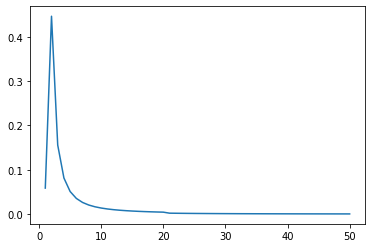

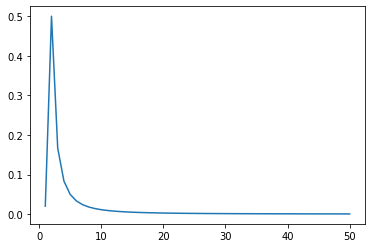

In [49]:
a=RIDL(50,0.05,0.05)
plt.figure()
a.plot_r()
plt.figure()
a.plot_p()
print(sum(a.p_r))

In [51]:
423936/9/1024

1504

In [52]:
round(9*1024/188/8)

6

In [10]:
bba=1
a?x=1:x=2

SyntaxError: invalid syntax (<ipython-input-10-86ba5f086885>, line 2)

In [51]:
 from scipy.special import comb, perm
 comb(3,2)

3.0

In [ ]:
k=10

for L in range(1,k+1):
    summ=0
    for i in range(1,k-L+2):
        summ+=
